# Clonality and chromosomes ploidy characteristics of Breast Tumors
**-- including the second and the third questions**

**Subject:** Whole-exome sequencing of 41 breast tumors analyzed using sciClone.

**Questions:**

- 2. What is the subclonal architecture in each breast tumor?
- 3. How are regions with different copy numbers distributed in each tumor? Which chromosome are they located in? What are the chromosome characteristics (hypodiploid and hyperdiploid) in breast tumors?

**Objective:** 

- 2. Inferring subclonal architecture objectively in breast tumors.
    - Generate Kernel Density plots of VAFs across regions with different copy numbers
    - Provide the statistics of VAFs across regions with different copy numbers
    
- 3. Inferring chromosomes ploidy characteristics in breast tumors.
    - Get the regions/chromosomes with different copy numbers distributed in each tumor.
    - Collect chromosome ploidy information from 41 breast tumors.

### Question 1: What is the subclonal architecture in the breast tumors?

In [341]:
def VAF_distribution(input_file_path, copy_number = None , output_path = None):
    '''Generate Kernel density plots of VAFs across regions with copy number one, two, or three
    -----
    Paraters:
    input_file_path: string
        the name of input file
    copy_number: number
        the copy number of regions to analysis. The default is one, two, three, and four.
    output_path(optional): string
        the direction to save the plot. The default is not save.
    -----
    Results:
    Kernel density plots of VAFs
    '''
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import gaussian_kde
    import re
    

    motif = re.compile(r'(?P<id>BC[\d]+T)')
    match = motif.search(input_file_path)
    tumor_id = match['id']
    
    
    # import data as dataframe and filter the dataframe by copy numbers
    data = pd.read_csv(input_file_path, sep = '\t')
    
    # generate density plots for all copy numbers if no specific copy number given
    if copy_number == None:
        for copy_number in range(1, 5, 1):
            data_filtered = data[data[tumor_id+'.cleancn'] == copy_number]
    
            VAF_list = data_filtered[tumor_id+'.vaf'].tolist()
            VAF_arrary = np.asarray(VAF_list)
            
            if len(VAF_list) > 1:
                density = gaussian_kde(VAF_list)
                x_vals = np.linspace(0,100,1000)
                density.covariance_factor = lambda : .5 #Smoothing parameter

                density._compute_covariance()
                plt.plot(x_vals,density(x_vals),label=copy_number)
                plt.legend()
                
                print(f'The mean of VAF on regions with copy number {copy_number} is {np.average(VAF_arrary):.2f}%.')
                print(f'The median of VAF on regions with copy number {copy_number} is {np.median(VAF_arrary):.2f}%.') 
                print(f'The std of VAF on regions with copy number {copy_number} is {np.std(VAF_arrary):.2f}%.\n')
            else:
                # print warning message when too few varitants are detected with the copy number
                print(f'Only {len(VAF_list)} VAF detected with copy number {copy_number}, not enough to generate Kernel density plot.\n')
                continue
                
    # generate density plots for the specific copy number given      
    else:
        data_filtered = data[data[tumor_id+'.cleancn'] == copy_number]
    
        VAF_list = data_filtered[tumor_id+'.vaf'].tolist()
        VAF_arrary = np.asarray(VAF_list)
            
        if len(VAF_list) > 1:
            density = gaussian_kde(VAF_list)
            x_vals = np.linspace(0,100,1000)
            density.covariance_factor = lambda : .5 #Smoothing parameter

            density._compute_covariance()
            plt.plot(x_vals,density(x_vals), label=copy_number)
            plt.legend()
            
            print(f'The mean of VAF on regions with copy number {copy_number} is {np.average(VAF_arrary):.2f}%.')
            print(f'The median of VAF on regions with copy number {copy_number} is {np.median(VAF_arrary):.2f}%.') 
            print(f'The std of VAF on regions with copy number {copy_number} is {np.std(VAF_arrary):.2f}%.\n')
            
        else:
            print(f'Only {len(VAF_list)} VAF detected with copy number {copy_number}, not enough to generate Kernel density plot.\n')
    
    # print the plot directly or save the plot to the output_path given
    if output_path == None:
        plt.show()
    else:
        plt.savefig(output_path)


The mean of VAF on regions with copy number 1 is 15.22%.
The median of VAF on regions with copy number 1 is 13.62%.
The std of VAF on regions with copy number 1 is 7.16%.

The mean of VAF on regions with copy number 2 is 12.33%.
The median of VAF on regions with copy number 2 is 10.77%.
The std of VAF on regions with copy number 2 is 6.95%.

Only 0 VAF detected with copy number 3, not enough to generate Kernel density plot.

Only 1 VAF detected with copy number 4, not enough to generate Kernel density plot.



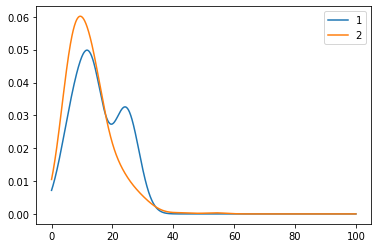

In [342]:
# Example:
VAF_distribution('data/clonality_data/BC02T.clusters.txt', None, output_path = 'figure/BC02T_density-plot.pdf')

**Conclusions:**

In this specific case of breast tumor (BC02T):
1. The SNVs detected from whole-exome sequencing formed a high-density region near 15% VAF.
2. A cluster of lower VAFs is detected in regions with copy number one, which could possibly indicate the presence of a subclonal population.

### Question 2: What are the chromosome characteristics in breast tumors? How are regions with different copy numbers distributed? Which chromosome are they located in?

In [345]:
def copy_number_distribution(input_file_path):
    '''Get the distribution of regions with different copy numbers in breast tumors.
    -----
    Paraters:
    input_file_path: string
        the name of input file
    copy_number: number
        the copy number of regions to analysis. The default is one, two, three, and four.
    -----
    Results:
    Output file: CSV
        The distribution of regions with different copy numbers in breast tumors.
    '''
    import pandas as pd
    
    chrom_dic = {}

    for copy_number in range(1, 5, 1):
        chrom_list = []
        
        with open(input_file_path, 'r') as f:
            for line in f:
                if line.rstrip().split()[6] == str(copy_number) and line.rstrip().split()[0] not in chrom_list:
                    chrom_list.append(line.rstrip().split()[0])
  
        chrom_dic[copy_number] = chrom_list
        

    for key, value in chrom_dic.items():
        print(f'Copy number {key}, found in {len(value)} chromosomes: {value}\n')

In [346]:
# Example
copy_number_distribution('data/clonality_data/BC02T.clusters.txt')

Copy number 1, found in 2 chromosomes: ['chr5', 'chr8']

Copy number 2, found in 21 chromosomes: ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX']

Copy number 3, found in 0 chromosomes: []

Copy number 4, found in 1 chromosomes: ['chr16']



**Conclusions:**

In this specific case of breast tumor (BC02T):
- most chromosomes have two copies.
- no chromosome has regions with 3 copies, and only chromosome 16 has regions with four copies.

In [374]:
def chromosome_finder(input_file_path, copy_number):
    
    chrom_list = []
        
    with open(input_file_path, 'r') as f:
        for line in f:
            if line.rstrip().split()[6] == str(copy_number) and line.rstrip().split()[0] not in chrom_list:
                chrom_list.append(line.rstrip().split()[0])
                
    return chrom_list

def copy_number_collection(folder_path, copy_number, output_path = None):
    ''' Get the chromosome with hypodiploid/hyperdiploid phenotype in each breat tumor.
    -----
    Paraters:
    folder_path: string
        the name of input folder which includes all the data files
    copy_number: number
        the copy number of regions to analysis.
    -----
    Results:
    '''
    
    from os import listdir
    import pandas as pd
    
    count_neg = 0
    chromosome_dic = {}
    
    input_file_list = []
    for file in listdir(folder_path):
        input_file_list.append(folder_path+file)
        
    for file in input_file_list:
        chromosome_list = chromosome_finder(file, copy_number)
        if len(chromosome_list) == 0:
            count_neg += 1
        else:
            for item in chromosome_list:
                if item not in chromosome_dic:
                    chromosome_dic[item] = 1
                else:
                    chromosome_dic[item] += 1
    
    percentage_neg = count_neg/len(input_file_list)
    print(f'{percentage_neg:.2f} of breast tumors have no region with copy number {copy_number}.\n')
    print(f'{1 - percentage_neg:.2f} of breast tumors have regions with copy number {copy_number}.')
    print(f'The distributions of these regions:\n')
    
    for key, value in chromosome_dic.items():
        print(f'{value} of {len(input_file_list)-count_neg} ({value/(len(input_file_list)-count_neg):.2f}) locate on {key}')
        
    if output_path != None:
        data = pd.DataFrame(chromosome_dic, index=['count'])
        data.to_csv(output_path)
    else:
        pass

In [376]:
# Example:
copy_number_collection('data/clonality_data/', 1, 'figure/Copy_number_1.csv')

0.34 of breast tumors have no region with copy number 1.

0.66 of breast tumors have regions with copy number 1.
The distributions of these regions:

10 of 27 (0.37) locate on chr5
9 of 27 (0.33) locate on chr8
13 of 27 (0.48) locate on chr2
8 of 27 (0.30) locate on chr7
5 of 27 (0.19) locate on chr9
6 of 27 (0.22) locate on chr11
9 of 27 (0.33) locate on chr1
7 of 27 (0.26) locate on chr3
8 of 27 (0.30) locate on chrX
7 of 27 (0.26) locate on chr15
5 of 27 (0.19) locate on chr4
4 of 27 (0.15) locate on chr22
3 of 27 (0.11) locate on chr21
3 of 27 (0.11) locate on chr10
5 of 27 (0.19) locate on chr14
6 of 27 (0.22) locate on chr16
5 of 27 (0.19) locate on chr17
3 of 27 (0.11) locate on chr19
2 of 27 (0.07) locate on chr12
2 of 27 (0.07) locate on chr13
2 of 27 (0.07) locate on chr18
2 of 27 (0.07) locate on chr20
2 of 27 (0.07) locate on chr6


In [377]:
copy_number_collection('data/clonality_data/', 3, 'figure/Copy_number_3.csv')

0.51 of breast tumors have no region with copy number 3.

0.49 of breast tumors have regions with copy number 3.
The distributions of these regions:

6 of 20 (0.30) locate on chr8
3 of 20 (0.15) locate on chr17
7 of 20 (0.35) locate on chr1
3 of 20 (0.15) locate on chr5
3 of 20 (0.15) locate on chr20
4 of 20 (0.20) locate on chr6
3 of 20 (0.15) locate on chr15
3 of 20 (0.15) locate on chr10
3 of 20 (0.15) locate on chr16
3 of 20 (0.15) locate on chr19
3 of 20 (0.15) locate on chr9
4 of 20 (0.20) locate on chr11
3 of 20 (0.15) locate on chr18
3 of 20 (0.15) locate on chr7
3 of 20 (0.15) locate on chr12
2 of 20 (0.10) locate on chr13
2 of 20 (0.10) locate on chr14
2 of 20 (0.10) locate on chr2
2 of 20 (0.10) locate on chr21
2 of 20 (0.10) locate on chr22
2 of 20 (0.10) locate on chr3
2 of 20 (0.10) locate on chr4
2 of 20 (0.10) locate on chrX


In [379]:
copy_number_collection('data/clonality_data/', 4, 'figure/Copy_number_4.csv')

0.71 of breast tumors have no region with copy number 4.

0.29 of breast tumors have regions with copy number 4.
The distributions of these regions:

2 of 12 (0.17) locate on chr16
5 of 12 (0.42) locate on chr7
3 of 12 (0.25) locate on chr6
3 of 12 (0.25) locate on chrX
2 of 12 (0.17) locate on chr1
2 of 12 (0.17) locate on chr15
3 of 12 (0.25) locate on chr10
3 of 12 (0.25) locate on chr17
3 of 12 (0.25) locate on chr8
2 of 12 (0.17) locate on chr4
2 of 12 (0.17) locate on chr22
2 of 12 (0.17) locate on chr11
2 of 12 (0.17) locate on chr14
2 of 12 (0.17) locate on chr2
2 of 12 (0.17) locate on chr20
2 of 12 (0.17) locate on chr9
1 of 12 (0.08) locate on chr12
1 of 12 (0.08) locate on chr13
1 of 12 (0.08) locate on chr21
1 of 12 (0.08) locate on chr3
1 of 12 (0.08) locate on chr5


**Conclusions:**

Among the 41 breast tumors:
1. 66% of them have regions with one copy. Most of these regions are located on chr 2 (48%).
2. 49% of them have regions with three copies. Most of these regions are located on chr1 (35%) and chr8 (30%).
3. 29% of them have regions with four copies. Most of these regions are located on chr7 (42%).

Basing on these, the breast cancer might have a higher tendency to have hypodiploid phenotype on chr 2, and hyperdiploid phenotype on chr1, chr7, and chr8.